## Clase 1. Pipelines, cross-validation, ajuste de hiper-parametros

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn import set_config

set_config(display="diagram")

#!pip install feature_engine

In [ ]:
pip install scikit-learn

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib.pyplot

In [ ]:
pip install seaborn

In [ ]:
pip install numpy

In [2]:
df= pd.read_csv("loan_data_set.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,date
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,2021-03-16
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2021-03-16
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,2021-03-16
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2021-03-16
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2021-03-16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  date               614 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 67.3+ KB


In [5]:
#preprocesamiento
df= df.dropna(subset="LoanAmount")

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
date                  0
dtype: int64

In [7]:
df_pipe= df[["Loan_Amount_Term", "LoanAmount","Credit_History", "ApplicantIncome","CoapplicantIncome", "Property_Area"]]

In [8]:
X=df_pipe[["Loan_Amount_Term","Credit_History", "ApplicantIncome","CoapplicantIncome", "Property_Area"]]
y=df_pipe["LoanAmount"]

In [9]:
# Split dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=  train_test_split(X,y, test_size=0.2, random_state=123)

In [10]:
numerical_features = ["Loan_Amount_Term", "ApplicantIncome","CoapplicantIncome"]
categorical_features_num = ["Credit_History" ]
categorical_features_str = ["Property_Area"]


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model_mult= LinearRegression(fit_intercept=True)

model_mult.fit(X_train[numerical_features].head(5),y_train.head(5))
model_mult.coef_
model_mult.intercept_
prediccion= model_mult.predict(X_test[numerical_features].head(5))


print(r2_score(y_test.head(5),prediccion),
mean_squared_error(y_test.head(5),prediccion),
mean_absolute_error(y_test.head(5),prediccion))

-5.547138183893715 7892.18225239284 66.3395148805353


Pipelines en sklearn



Pipeline(steps=[('name_of_pipeline', pipeline),('name_of_preprocessor1', preprocessor1),('name_of_preprocessor2', preprocessor2), ('name_of_ml_model', ml_model())])

In [12]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
# generando el pipeline. se llna con una tupla que empieza con imputer lo que quiere decir es que a los Na lkes pone la media
numerical_features=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean")),
 ("scaler",StandardScaler()) ,                                 
])

## datos--> entran pipeline->imputer(datos)-->standar(imputer(datos))->minmax(standard(datos)))

In [14]:
# generando el  con make_pipeline. se llna con una tupla que empieza con imputer lo que quiere decir es que a los Na lkes pone la media
numerical_features = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler() )  #->standarscaler 

In [15]:
numerical_transformer= Pipeline (steps=[
('imputer', SimpleImputer(strategy='mean') ),
('scaler', StandardScaler())
])

# numerical_transformer =make_pipeline(
# SimpleImputer(strategy='mean'), #=> simpleimputer
# StandardScaler() #=> standardscaler

# )

categorical_transformer_num= Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(drop='first'))
])

categorical_transformer_str= Pipeline(steps=[
    ('imputer_str', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(drop='first'))
])




In [ ]:
#preprocessor=ColumnTransformer(transformers=[
#("numercial",numerical_transformer,numerical_features),
#("categ_num",categorical_transformer_num,categorical_features_num),
#("categ_str",categorical_transformer_str,categori)])

Despues de generar los pipelines se le dice a quien se los aplica

In [16]:
from sklearn.compose import ColumnTransformer # otra función que actua como una espcie de pipelien

preprocessor= ColumnTransformer(
    transformers=[
     ('numeric', numerical_transformer,numerical_features ), # soloi busca las columnas que estan en numerical_feature
     ('categ_num', categorical_transformer_num,categorical_features_num ), # soloi busca las columnas que estan en categorical_features_num
     ('categ_str', categorical_transformer_str,categorical_features_str)# soloi busca las columnas que estan en categorical_features_str
    ]
)

In [40]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler',
                                                  StandardScaler())])),
                                ('categ_num',
                                 Pipeline(steps=[('imputer_num',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Credit_History']),
                                ('categ_str',
                                 Pipeline(steps=[('imputer_str',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='first'))]),
                                 ['Property_Area'])])

In [17]:
from sklearn.linear_model import Ridge

pipeline = Pipeline(
    steps=[('preprocessor_column', preprocessor),   
            ('modelo_ridge', Ridge(alpha=0.1)) ])

In [22]:
pipeline

Pipeline(steps=[('preprocessor_column',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome']),
                                                 ('categ_num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Credit_History']),
                                                 ('categ_str',
                                                  Pipeline(steps=[('imputer_str',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Property_Area'])])),
                ('modelo_ridge', Ridge(alpha=0.1))])

ya teniendo el pipeline definimos el ridge

In [18]:
modelo_ridge= pipeline.fit(X_train,y_train)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [19]:
print(modelo_ridge)

NameError: name 'modelo_ridge' is not defined

In [25]:
from sklearn.metrics import r2_score

prediccionridge= modelo_ridge.predict(X_test)
print(r2_score(y_test,prediccionridge))

0.5416113455345769


In [26]:
X_test

,Loan_Amount_Term,Credit_History,ApplicantIncome,CoapplicantIncome,Property_Area
447,360.0,1.0,3539,1376.0,Rural
56,360.0,1.0,2132,1591.0,Semiurban
442,360.0,1.0,4707,1993.0,Semiurban
543,360.0,1.0,2239,2524.0,Urban
513,180.0,1.0,2130,6666.0,Semiurban
...,...,...,...,...,...
160,360.0,1.0,1863,1041.0,Semiurban
188,360.0,1.0,674,5296.0,Rural
329,360.0,1.0,2500,0.0,Urban
69,360.0,0.0,4300,0.0,Semiurban


In [27]:
pd.DataFrame(pipeline[:-1].transform(X_test))#.iloc[:,3].unique()

,0,1,2,3,4,5
0,0.253093,-0.317720,-0.082220,1.0,0.0,0.0
1,0.253093,-0.570752,0.000323,1.0,1.0,0.0
2,0.253093,-0.107670,0.154659,1.0,1.0,0.0
3,0.253093,-0.551509,0.358520,1.0,0.0,1.0
4,-2.668678,-0.571112,1.948716,1.0,1.0,0.0
...,...,...,...,...,...,...
114,0.253093,-0.619128,-0.210833,1.0,1.0,0.0
115,0.253093,-0.832955,1.422746,1.0,0.0,0.0
116,0.253093,-0.504572,-0.610493,1.0,0.0,1.0
117,0.253093,-0.180864,-0.610493,0.0,1.0,0.0


Guardar el modelo

In [28]:
import joblib

In [31]:
joblib.dump(modelo_ridge,'modelo_ridge.pkl')

['modelo_ridge.pkl']

In [33]:

modelo_ridge_nuevo= joblib.load("modelo_ridge.pkl")

In [34]:
nueva_prediccion= modelo_ridge_nuevo.predict(X_test)

In [35]:
print(r2_score(y_test,nueva_prediccion))

0.5416113455345769


In [36]:
modelo_ridge_nuevo

Pipeline(steps=[('preprocessor_column',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome']),
                                                 ('categ_num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Credit_History']),
                                                 ('categ_str',
                                                  Pipeline(steps=[('imputer_str',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Property_Area'])])),
                ('modelo_ridge', Ridge(alpha=0.1))])

Personalizacion de transformadores en sklearn

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin


# class NombreClase(BaseEstimator,TransformerMixin):
#     def __init__(self):
        
#     def fit(self, X,y=None):
#         return 
#     def transform(self, X):
#         return
    

In [30]:
class ColumnSelector(BaseEstimator,TransformerMixin):
    def __init__(self, columns):
        self.columns =columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.columns]

In [31]:
from sklearn.preprocessing import RobustScaler
class NumericalIQscaler(BaseEstimator,TransformerMixin):
    def __init__(self, columns):
        self.columns=columns
        self._scaler = RobustScaler()
        return None
    
    def fit(self, X,y=None):
        X = self._scaler.fit(X)
        return self
    
    def remover_outlier(self, X):
        x= pd.DataFrame(X,columns=self.columns)
        for col in x.columns:
            Q1= x[col].quantile(0.25)
            Q3= x[col].quantile(0.75)
            IQR= Q3-Q1
            low= Q1 -1.5*IQR
            high= Q1+1.5*IQR

            x[col] = np.where(x[col]<low,low,x[col])
            x[col] = np.where(x[col]>high, high,x[col])
        return x


            ##  low= 0.1   hight= 7  => intervalo [0.1, 7]
            # 0.01 ,0.2, 6, 8  => 
            # 0.01 => 0.1
            #0.2   => 0.2
            # 6   =>  6
            # 8   =>  7 
    def transform(self, X):
        #X=> dataframe => X.columns, X.index, X.head(), X.sample() 
        X =self.remover_outlier(X)
        X=pd.DataFrame(self._scaler.transform(X),columns=X.columns,index=X.index)
        return X




In [32]:
categorical_features_num

['Credit_History']

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from feature_engine.encoding import OneHotEncoder as OneHot_feature
cat_pipeline = Pipeline(
    steps=[
('selector_cat', ColumnSelector(categorical_features_num)),
('imputer', SimpleImputer(strategy='most_frequent')),
#('one_hot_cat',OneHotEncoder(drop='first'))
('onehotfeat_eng',OneHot_feature(drop_last=False,ignore_format=True))
    ]
)

num_pipeline =Pipeline(steps=[
('selector_num', ColumnSelector(numerical_features)),
('imputer', SimpleImputer(strategy='mean')),
('max_min', MinMaxScaler())
]
)

num_robustOL_pipeline =Pipeline(steps=[
    ('selector_num', ColumnSelector(numerical_features)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler_robust', NumericalIQscaler(numerical_features))
])
num_pipeline_new = make_pipeline(
    ColumnSelector(numerical_features),
    SimpleImputer(strategy='median'),
)



In [34]:
from sklearn.pipeline import FeatureUnion
preprocessorunion = FeatureUnion(
transformer_list=[
('cat_pipeline',cat_pipeline),
('cat_numerical',num_pipeline),
('num_robustOL_pipeline', num_robustOL_pipeline),
('pipeline_new', num_pipeline_new)]
)

In [35]:
from sklearn.linear_model import LinearRegression
pipelineunion= Pipeline(steps=[
("Preprocessor_Union",preprocessorunion),
('modelo',LinearRegression(fit_intercept=True))
])

In [36]:
pipelineunion

Pipeline(steps=[('Preprocessor_Union',
                 FeatureUnion(transformer_list=[('cat_pipeline',
                                                 Pipeline(steps=[('selector_cat',
                                                                  ColumnSelector(columns=['Credit_History'])),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('onehotfeat_eng',
                                                                  OneHotEncoder(ignore_format=True))])),
                                                ('cat_numerical',
                                                 Pipeline(steps=[('selector_num',
                                                                  ColumnSelector(columns=['Loan_Am...
                                                                 ('imputer',
                                                                  SimpleImputer()),
                                                                 ('scaler_robust',
                                                                  NumericalIQscaler(columns=['Loan_Amount_Term',
                                                                                             'ApplicantIncome',
                                                                                             'CoapplicantIncome']))])),
                                                ('pipeline_new',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['Loan_Amount_Term',
                                                                                          'ApplicantIncome',
                                                                                          'CoapplicantIncome'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(strategy='median'))]))])),
                ('modelo', LinearRegression())])

In [37]:
pipelineunion.fit(X_train,y_train)

c:\Users\javier\miniconda3\envs\py10\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


Pipeline(steps=[('Preprocessor_Union',
                 FeatureUnion(transformer_list=[('cat_pipeline',
                                                 Pipeline(steps=[('selector_cat',
                                                                  ColumnSelector(columns=['Credit_History'])),
                                                                 ('imputer',
                                                                  SimpleImputer(strategy='most_frequent')),
                                                                 ('onehotfeat_eng',
                                                                  OneHotEncoder(ignore_format=True))])),
                                                ('cat_numerical',
                                                 Pipeline(steps=[('selector_num',
                                                                  ColumnSelector(columns=['Loan_Am...
                                                                 ('imputer',
                                                                  SimpleImputer()),
                                                                 ('scaler_robust',
                                                                  NumericalIQscaler(columns=['Loan_Amount_Term',
                                                                                             'ApplicantIncome',
                                                                                             'CoapplicantIncome']))])),
                                                ('pipeline_new',
                                                 Pipeline(steps=[('columnselector',
                                                                  ColumnSelector(columns=['Loan_Amount_Term',
                                                                                          'ApplicantIncome',
                                                                                          'CoapplicantIncome'])),
                                                                 ('simpleimputer',
                                                                  SimpleImputer(strategy='median'))]))])),
                ('modelo', LinearRegression())])

In [38]:
predict_nuevo_pipeline= pipelineunion.predict(X_test)

c:\Users\javier\miniconda3\envs\py10\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [39]:
print(r2_score(y_test,predict_nuevo_pipeline))

0.5627601435152285


In [40]:
X_test

,Loan_Amount_Term,Credit_History,ApplicantIncome,CoapplicantIncome,Property_Area
447,360.0,1.0,3539,1376.0,Rural
56,360.0,1.0,2132,1591.0,Semiurban
442,360.0,1.0,4707,1993.0,Semiurban
543,360.0,1.0,2239,2524.0,Urban
513,180.0,1.0,2130,6666.0,Semiurban
...,...,...,...,...,...
160,360.0,1.0,1863,1041.0,Semiurban
188,360.0,1.0,674,5296.0,Rural
329,360.0,1.0,2500,0.0,Urban
69,360.0,0.0,4300,0.0,Semiurban


In [41]:
# https://feature-engine.readthedocs.io/en/latest/
#!pip install feature_engine

### Cross validation

In [42]:
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold

In [43]:
df_cv= df[["Loan_Amount_Term", "LoanAmount","Credit_History", "ApplicantIncome","Gender"]]
df_cv =df_cv.dropna()

In [44]:
df_cv.isnull().sum()

Loan_Amount_Term    0
LoanAmount          0
Credit_History      0
ApplicantIncome     0
Gender              0
dtype: int64

In [45]:
X=df_cv[["Loan_Amount_Term", "Credit_History", "ApplicantIncome","Gender"]]
y= df_cv["LoanAmount"]
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.8,random_state=12)

In [46]:
group_train= X_train["Gender"]
group_test= X_test["Gender"]
X_train=X_train.drop("Gender",axis=1)
X_test=X_test.drop("Gender",axis=1) 

In [47]:
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )

def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

def plot_cv(cv, X, y, groups, n_splits=5):
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Validation set", "Training set"],
        loc=(1.02, 0.8),
    )
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    plt.show()

def get_fake_X_y():
    # Fake Generate the class/group data for an example
    n_points = 100
    X_ = np.random.randn(100, 10)

    percentiles_classes = [0.1, 0.9]
    y_ = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

    # Evenly spaced groups repeated once
    groups_ = np.hstack([[ii] * 10 for ii in range(10)])
    return X_, y_, groups_

K-folds

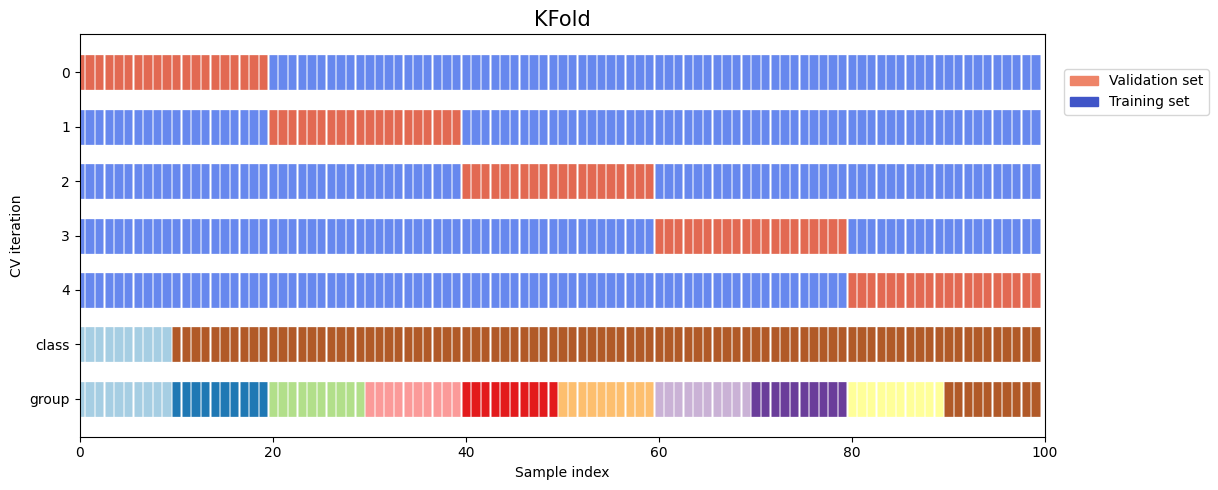

In [48]:
kf= KFold()
X_,y_, groups_ =get_fake_X_y()
plot_cv(KFold,X_,y_,groups_)

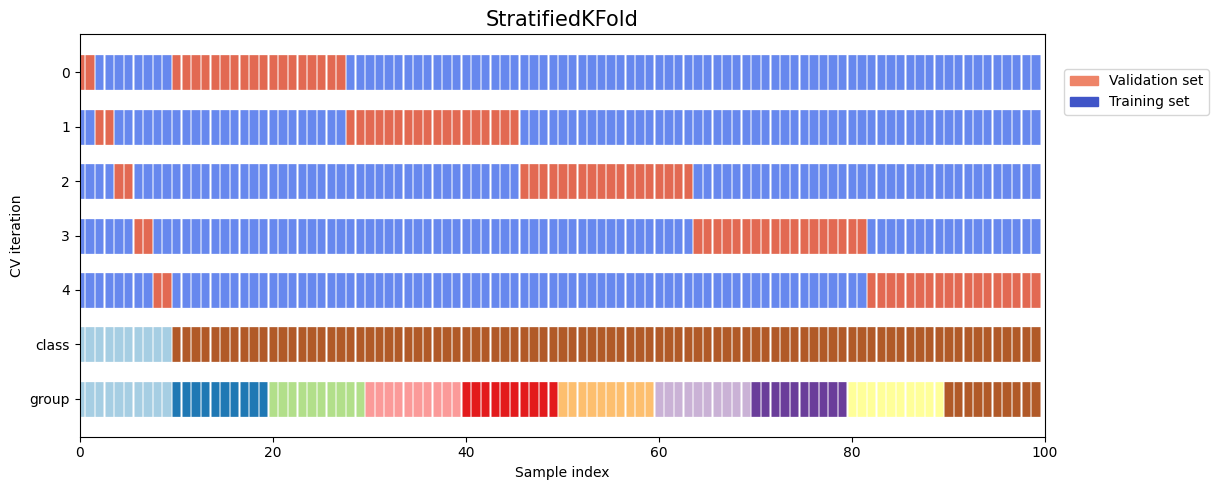

In [49]:
X_,y_, groups_ =get_fake_X_y()
plot_cv(StratifiedKFold,X_,y_,groups_)

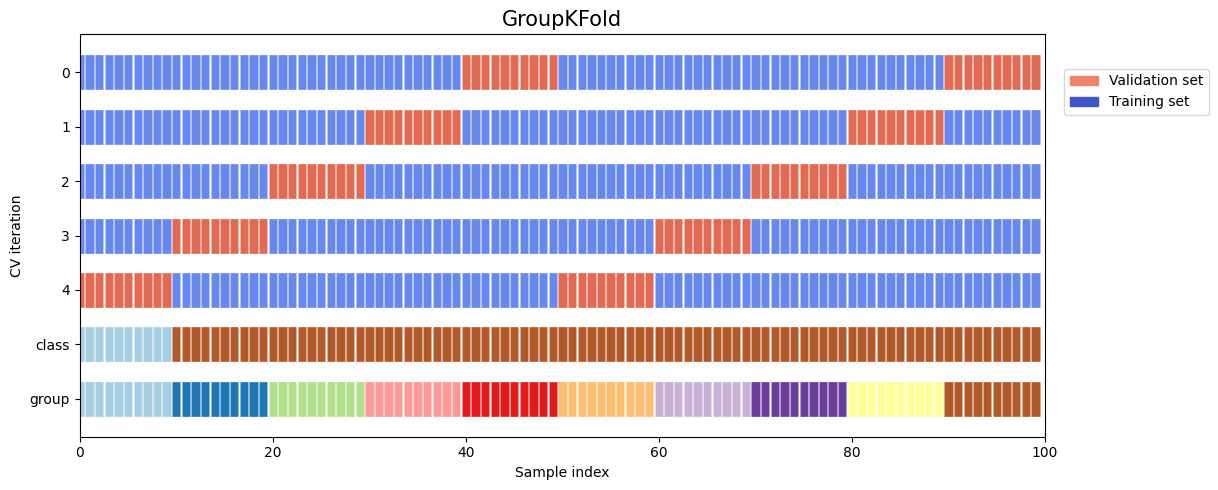

In [50]:
X_,y_, groups_ =get_fake_X_y()
plot_cv(GroupKFold,X_,y_,groups_)

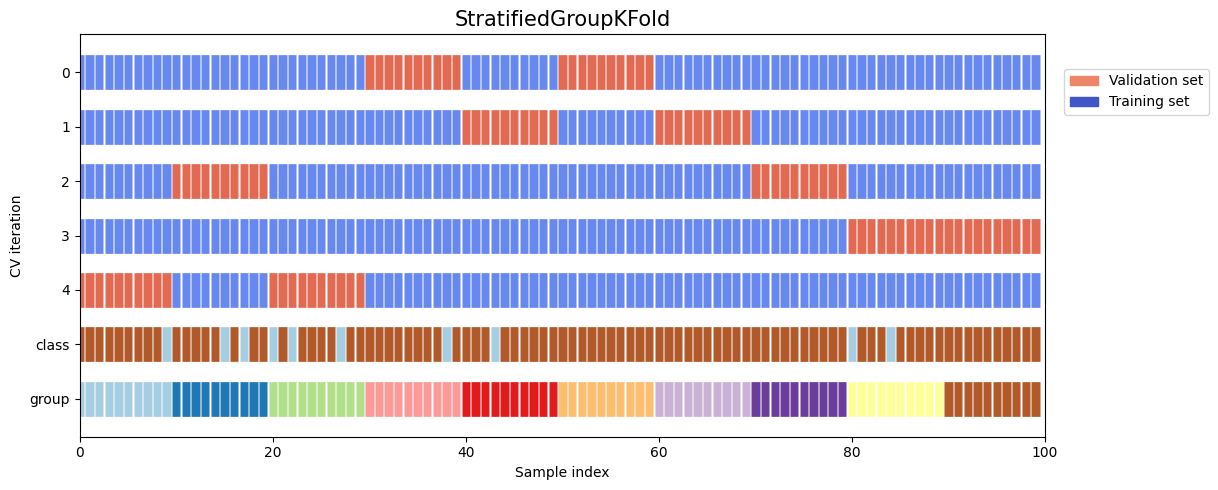

In [51]:
X_,y_, groups_ =get_fake_X_y()
np.random.shuffle(y_)
plot_cv(StratifiedGroupKFold,X_,y_,groups_)

In [52]:
cvfold = KFold(n_splits=5, shuffle=True,random_state=123)
fold=0
r2s=[]
for  train_idx, val_idx, in cvfold.split(X_train,y_train,group_train):
    X_tr= X_train.iloc[train_idx]
    y_tr= y_train.iloc[train_idx]
    X_val= X_train.iloc[val_idx]
    y_val= y_train.iloc[val_idx]
    LR= LinearRegression(fit_intercept=True)
    LR.fit(X_tr,y_tr)
    prediccion= LR.predict(X_val)
    r2=r2_score(y_val,prediccion)
    print(f'=========fold{fold}')
    print(f"r2 es igual a : {r2:0.4f}")
    fold+=1
    r2s.append(r2)
r2total=np.mean(r2s)
print(f"el r2 total del modelo es igual a {r2total:0.4f}")




=========fold0
r2 es igual a : 0.3102
=========fold1
r2 es igual a : 0.2559
=========fold2
r2 es igual a : 0.0013
=========fold3
r2 es igual a : -0.1380
=========fold4
r2 es igual a : 0.3137
el r2 total del modelo es igual a 0.1486


## Ajuste de hiper-parametros

In [53]:
df_cv= df[["Loan_Amount_Term", "LoanAmount","Credit_History", "ApplicantIncome","Gender"]]
#df_cv =df_cv.dropna()
X=df_cv[["Loan_Amount_Term", "Credit_History", "ApplicantIncome","Gender"]]
y=df_cv["LoanAmount"]
X_train, X_test, y_train,y_test=train_test_split(X,y, train_size=0.8,random_state=12) 

In [54]:
numerical_features=["Loan_Amount_Term", "ApplicantIncome"]
categorical_features_num=["Credit_History"]
categorical_features_str=["Gender"]


numerical_transformer= Pipeline (steps=[
('imputer', SimpleImputer(strategy='mean') ),
('scaler', StandardScaler())
])

# numerical_transformer =make_pipeline(
# SimpleImputer(strategy='mean'), #=> simpleimputer
# StandardScaler() #=> standardscaler

# )

categorical_transformer_num= Pipeline(steps=[
    ('imputer_num', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(drop='first'))
])

categorical_transformer_str= Pipeline(steps=[
    ('imputer_str', SimpleImputer(strategy="most_frequent")),
    ('one_hot', OneHotEncoder(drop='first'))
])

In [55]:
preprocessor= ColumnTransformer(

    transformers=[
("numerical" , numerical_transformer, numerical_features),
("categorical_num", categorical_transformer_num,categorical_features_num),
("categorical_str", categorical_transformer_str,categorical_features_str)

    ]
) 

In [56]:
from sklearn.linear_model import ElasticNet,Lasso,SGDRegressor

pipeline = Pipeline(
steps=[
 ("preprocessor", preprocessor),
 ('modelEN', ElasticNet())
])

 Grid-Search

In [57]:
from sklearn.model_selection import GridSearchCV

parameters=[
    {
     "modelEN__alpha": np.geomspace(1e-3,10, num=50) ,
     "modelEN__l1_ratio":  [0.1,0.3,0.5, 0.7,0.9]

    }
]
gs_EN= GridSearchCV(estimator= pipeline,param_grid= parameters, scoring= 'r2')

In [58]:
gs_EN.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Loan_Amount_Term',
                                                                          'ApplicantIncome']),
                                                                        ('categorical_num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['C...
       1.93069773e-01, 2.32995181e-01, 2.81176870e-01, 3.39322177e-01,
       4.09491506e-01, 4.94171336e-01, 5.96362332e-01, 7.19685673e-01,
       8.68511374e-01, 1.04811313e+00, 1.26485522e+00, 1.52641797e+00,
       1.84206997e+00, 2.22299648e+00, 2.68269580e+00, 3.23745754e+00,
       3.90693994e+00, 4.71486636e+00, 5.68986603e+00, 6.86648845e+00,
       8.28642773e+00, 1.00000000e+01]),
                          'modelEN__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}],
             scoring='r2')

In [59]:
gs_EN.best_params_

{'modelEN__alpha': 0.49417133613238334, 'modelEN__l1_ratio': 0.9}

In [60]:
gs_EN.score(X_test,y_test)


-0.21392244878194644

Grid search sobre varios modelos

In [61]:
pipelineM = Pipeline(
steps=[
 ("preprocessor", preprocessor),
 ('estimador', ElasticNet())
])

In [62]:
params_grid=[

    {
    'estimador':[ElasticNet()],
        "estimador__alpha": np.geomspace(1e-3,10, num=50) ,
     "estimador__l1_ratio":  [0.1,0.3,0.5, 0.7,0.9]

    },
    {'estimador':[Ridge()],
        "estimador__alpha": np.geomspace(1e-3,10, num=50) },

    {'estimador':[Lasso()],
        "estimador__alpha": np.geomspace(1e-3,10, num=50) 
    },
    {'estimador':[SGDRegressor()],
        "estimador__alpha": np.geomspace(1e-3,10, num=50) 
    }

]

In [63]:
grid = GridSearchCV(pipelineM, params_grid,cv=5, scoring='r2')

In [64]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Loan_Amount_Term',
                                                                          'ApplicantIncome']),
                                                                        ('categorical_num',
                                                                         Pipeline(steps=[('imputer_num',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(drop='first'))]...
       9.10298178e-02, 1.09854114e-01, 1.32571137e-01, 1.59985872e-01,
       1.93069773e-01, 2.32995181e-01, 2.81176870e-01, 3.39322177e-01,
       4.09491506e-01, 4.94171336e-01, 5.96362332e-01, 7.19685673e-01,
       8.68511374e-01, 1.04811313e+00, 1.26485522e+00, 1.52641797e+00,
       1.84206997e+00, 2.22299648e+00, 2.68269580e+00, 3.23745754e+00,
       3.90693994e+00, 4.71486636e+00, 5.68986603e+00, 6.86648845e+00,
       8.28642773e+00, 1.00000000e+01])}],
             scoring='r2')

In [65]:
grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term',
                                                   'ApplicantIncome']),
                                                 ('categorical_num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Credit_History']),
                                                 ('categorical_str',
                                                  Pipeline(steps=[('imputer_str',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender'])])),
                ('estimador', Lasso(alpha=2.6826957952797246))])

In [66]:
grid.best_params_

{'estimador': Lasso(alpha=2.6826957952797246),
 'estimador__alpha': 2.6826957952797246}

In [67]:
grid.score(X_test,y_test)

-0.23729726178169486